# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Zerocode projects/DataAnalysis/Lesson_PN14/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю snake_case

In [ ]:
df.rename(columns={'TransactionID':'transaction_id'}, inplace=True)
df.rename(columns={'CustomerID':'customer_id'}, inplace=True)
df.rename(columns={'CustomerDOB':'customer_dob'}, inplace=True)
df.rename(columns={'CustGender':'cust_gender'}, inplace=True)
df.rename(columns={'CustLocation':'cust_location'}, inplace=True)
df.rename(columns={'CustAccountBalance':'cust_account_balance'}, inplace=True)
df.rename(columns={'TransactionDate':'transaction_date'}, inplace=True)
df.rename(columns={'TransactionTime':'transaction_time'}, inplace=True)
df.rename(columns={'TransactionAmount (INR)':'transaction_amount_inr'}, inplace=True)

In [ ]:
df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение типов данных

In [ ]:
#привести дату к типу datetime

In [ ]:
df[df['transaction_time'] == '000000']

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr


In [ ]:
from datetime import datetime # import the datetime module

# Attempt to parse the time data, allowing for missing minutes and seconds
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H%M%S', errors='coerce').dt.time

# Check for NaT (Not a Time) values, which indicate parsing failures
if df['transaction_time'].isnull().any():
  # Handle the NaT values (e.g., replace with 00:00:00)
  df['transaction_time'] = df['transaction_time'].fillna(pd.to_datetime('00:00:00').time())

In [ ]:
df[df['transaction_time'] == '00:00:00']

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr


In [ ]:
df['transaction_date'] = df['transaction_date'].astype(str)
df['transaction_time'] = df['transaction_time'].astype(str)

In [ ]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'], format='%d/%m/%y %H:%M:%S')

In [ ]:
# Drop the old 'transaction_date' and 'transaction_time' columns
df = df.drop(['transaction_date', 'transaction_time'], axis=1)

In [ ]:
df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_amount_inr,transaction_datetime
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,25.0,2016-08-02 14:32:07
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,27999.0,2016-08-02 14:18:58
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,459.0,2016-08-02 14:27:12
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2060.0,2016-08-02 14:27:14
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,1762.5,2016-08-02 18:11:56
...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,799.0,2016-09-18 18:48:24
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,460.0,2016-09-18 18:37:34
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,770.0,2016-09-18 18:33:13
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,1000.0,2016-09-18 18:47:06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1048567 non-null  object        
 1   customer_id             1048567 non-null  object        
 2   customer_dob            1045170 non-null  object        
 3   cust_gender             1047467 non-null  object        
 4   cust_location           1048416 non-null  object        
 5   cust_account_balance    1046198 non-null  float64       
 6   transaction_amount_inr  1048567 non-null  float64       
 7   transaction_datetime    1048567 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 64.0+ MB


# Поиск дублей и пропусков в данных

In [ ]:
# Check for any duplicate rows in the entire DataFrame
duplicates = df.duplicated()

# Display duplicate rows
print(df[duplicates])


Empty DataFrame
Columns: [transaction_id, customer_id, customer_dob, cust_gender, cust_location, cust_account_balance, transaction_amount_inr, transaction_datetime]
Index: []


In [ ]:
# Check for duplicates based on specific columns, e.g., 'transaction_id'
duplicates_specific = df.duplicated(subset=['transaction_id'])

# Display duplicate rows based on specific columns
print(df[duplicates_specific])


Empty DataFrame
Columns: [transaction_id, customer_id, customer_dob, cust_gender, cust_location, cust_account_balance, transaction_amount_inr, transaction_datetime]
Index: []


In [ ]:
# Check for duplicates based on specific columns, e.g., 'transaction_datetime' and 'customer_id'
duplicates_specific = df.duplicated(subset=['transaction_datetime', 'customer_id'])

# Display duplicate rows based on specific columns
print(df[duplicates_specific])


Empty DataFrame
Columns: [transaction_id, customer_id, customer_dob, cust_gender, cust_location, cust_account_balance, transaction_amount_inr, transaction_datetime]
Index: []


# ВЫВОД:
Дубликатов в данных не обнаружено

# Исследовательский анализ данных

In [ ]:
df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_amount_inr,transaction_datetime
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,25.0,2016-08-02 14:32:07
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,27999.0,2016-08-02 14:18:58
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,459.0,2016-08-02 14:27:12
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2060.0,2016-08-02 14:27:14
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,1762.5,2016-08-02 18:11:56
...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,799.0,2016-09-18 18:48:24
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,460.0,2016-09-18 18:37:34
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,770.0,2016-09-18 18:33:13
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,1000.0,2016-09-18 18:47:06


In [ ]:
# сколько уникальных клиентов?

In [ ]:
number_unique_cust = df['customer_id'].nunique()
number_unique_cust

884265

In [ ]:
# какое количество транзакций было совершено?

In [ ]:
number_unique_trans = df['transaction_id'].nunique()
number_unique_trans

1048567

In [ ]:
# сколько в среднем транзакций приходится на одного клиента?

In [ ]:
average_trans_per_cust = number_unique_trans / number_unique_cust
average_trans_per_cust

1.1858062911005185

In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount

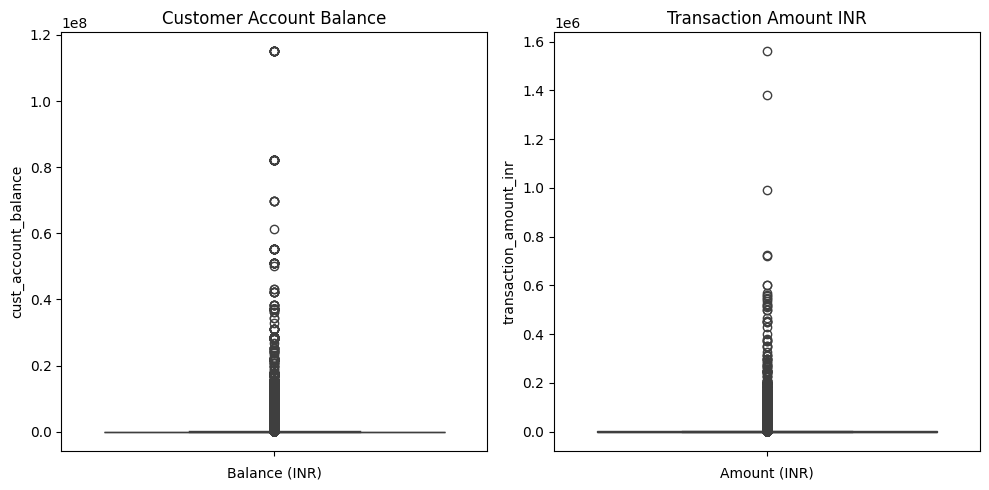

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение boxplot с использованием Seaborn
plt.figure(figsize=(10, 5))

# Boxplot для cust_account_balance
plt.subplot(1, 2, 1)
sns.boxplot(data=df['cust_account_balance'])
plt.title('Customer Account Balance')
plt.xlabel('Balance (INR)')

# Boxplot для transaction_amount_inr
plt.subplot(1, 2, 2)
sns.boxplot(data=df['transaction_amount_inr'])
plt.title('Transaction Amount INR')
plt.xlabel('Amount (INR)')

# Показ графиков
plt.tight_layout()
plt.show()


Как видим, визуализация данных мало информативна из-за наличия существенных аутлаеров.

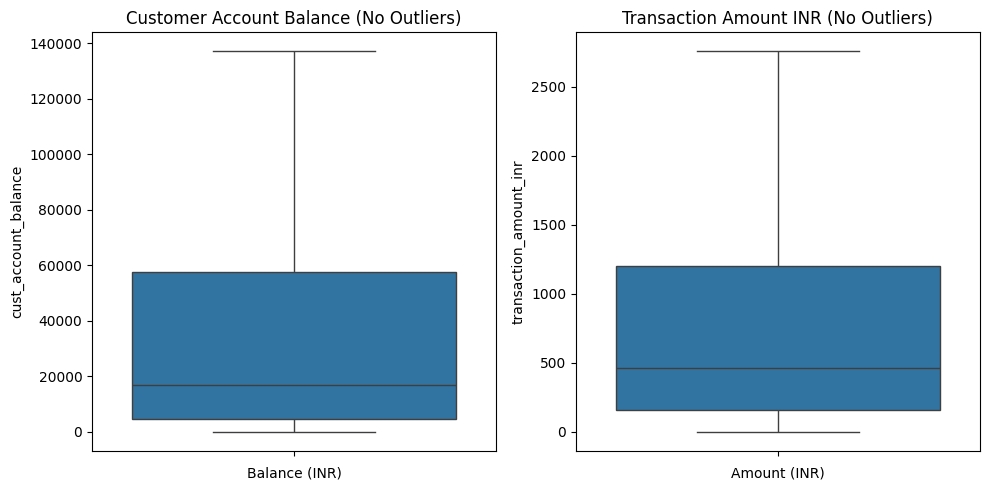

In [ ]:
# Построение boxplot с использованием Seaborn без аутлайеров
plt.figure(figsize=(10, 5))

# Boxplot для cust_account_balance без аутлайеров
plt.subplot(1, 2, 1)
sns.boxplot(data=df['cust_account_balance'], showfliers=False)
plt.title('Customer Account Balance (No Outliers)')
plt.xlabel('Balance (INR)')

# Boxplot для transaction_amount_inr без аутлайеров
plt.subplot(1, 2, 2)
sns.boxplot(data=df['transaction_amount_inr'], showfliers=False)
plt.title('Transaction Amount INR (No Outliers)')
plt.xlabel('Amount (INR)')

# Показ графиков
plt.tight_layout()
plt.show()

In [ ]:
# изучить возраст клиентов (визуализировать)

In [ ]:
df['customer_dob'].str[-3:].unique()

array(['/94', '/57', '/96', '/73', '/88', '/72', '/92', '/82', '/84',
       '/78', '/68', '800', '/89', '/91', '/85', '/93', '/86', '/67',
       '/79', '/77', '/97', '/83', '/90', '/80', '/81', '/66', '/87',
       '/75', '/95', '/74', '/71', '/32', '/59', nan, '/99', '/65', '/41',
       '/54', '/70', '/76', '/21', '/69', '/04', '/43', '/98', '/51',
       '/60', '/56', '/53', '/47', '/00', '/64', '/48', '/62', '/52',
       '/55', '/61', '/36', '/63', '/42', '/44', '/38', '/02', '/49',
       '/58', '/50', '/46', '/45', '/37', '/07', '/01', '/39', '/40',
       '/13', '/03', '/05', '/10', '/11', '/33', '/34', '/27', '/19',
       '/28', '/30', '/09', '/31', '/29', '/35', '/15', '/16', '/06',
       '/08', '/12', '/23', '/26', '/24', '/22', '/14', '/20', '/25',
       '/18'], dtype=object)

In [ ]:
df['customer_age'] = (pd.to_datetime('today') - pd.to_datetime(df['customer_dob'])).dt.days // 365

<ipython-input-30-47fe5cedede6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customer_age'] = (pd.to_datetime('today') - pd.to_datetime(df['customer_dob'])).dt.days // 365


In [ ]:
df['customer_age'].isna().sum()

3397

In [ ]:
df['customer_age'].unique()

array([ 29., -33.,  27., -50.,  36., -48.,  32.,  42.,  40.,  46., -45.,
       224.,  35.,  39.,  31.,  38.,  33.,  37., -43.,  45.,  47.,  26.,
        41.,  44.,  34.,  43., -42.,  30.,  48.,  50., -47., -44.,  -8.,
       -35.,  28.,  nan, -49.,  25., -41.,  24., -18., -31., -46.,  49.,
         3., -30.,  19., -20., -27., -37., -32., -24., -36., -25., -23.,
       -38., -28.,  -9., -39., -40., -13., -29., -14.,  22., -34., -26.,
       -19., -22.,  21.,  17., -12.,  23., -15., -16., -21.,  11.,  13.,
       -17.,  20., -10.,  -3., -11.,   4.,  -4.,  -6.,  15.,  -5.,   9.,
        -7.,  10.,   8.,  18.,  16.,  12.,   1.,  -2.,   0.,  14.,  -1.,
         6.])

Assuming the age of bank customer can not be less than 5 y.o. lets take into account 19xx-20xx problem

In [ ]:
import numpy as np # import numpy for nan

df['customer_age'] = df['customer_age'].apply(lambda x: x + 100 if x < 5 else x)
df['customer_age'] = df['customer_age'].apply(lambda x: np.nan if x > 120 else x)

In [ ]:
df['customer_age'].unique()

array([ 29.,  67.,  27.,  50.,  36.,  52.,  32.,  42.,  40.,  46.,  55.,
        nan,  35.,  39.,  31.,  38.,  33.,  37.,  57.,  45.,  47.,  26.,
        41.,  44.,  34.,  43.,  58.,  30.,  48.,  53.,  56.,  92.,  65.,
        28.,  51.,  25.,  59.,  24.,  82.,  69.,  54.,  49., 103.,  70.,
        19.,  80.,  73.,  63.,  68.,  76.,  64.,  75.,  77.,  62.,  72.,
        91.,  61.,  60.,  87.,  71.,  86.,  22.,  66.,  74.,  81.,  78.,
        21.,  17.,  88.,  23.,  85.,  84.,  79.,  11.,  13.,  83.,  20.,
        90.,  97.,  89., 104.,  96.,  94.,  15.,  95.,   9.,  93.,  10.,
         8.,  18.,  16.,  12., 101.,  98., 100.,  14.,  99.,   6.])

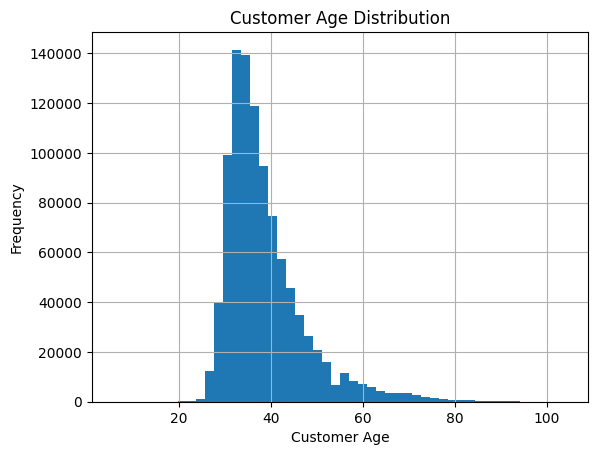

In [ ]:
df['customer_age'].hist(bins=50)
plt.xlabel('Customer Age') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.title('Customer Age Distribution') # Set the plot title
plt.show()

In [ ]:
# изучить пол клиентов (визуализировать)

In [ ]:
df['cust_gender'].unique()

array(['F', 'M', nan, 'T'], dtype=object)

In [ ]:
df['cust_gender'].isna().sum()

1100

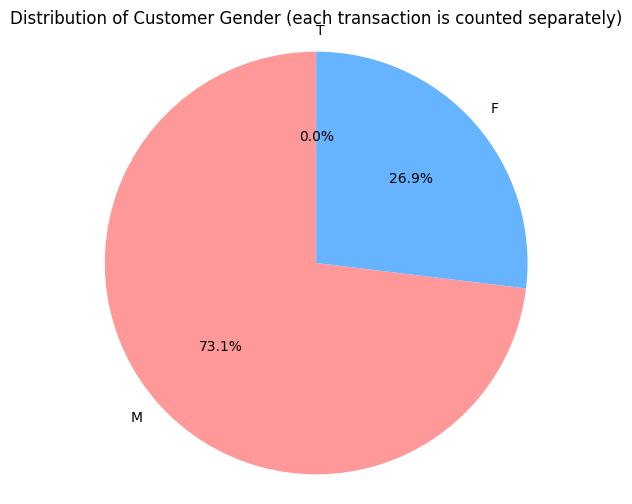

In [ ]:
# Count the occurrences of each gender
gender_counts = df['cust_gender'].value_counts()

# Plot pie chart for 'cust_gender'
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Distribution of Customer Gender (each transaction is counted separately)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

# Show the plot
plt.show()

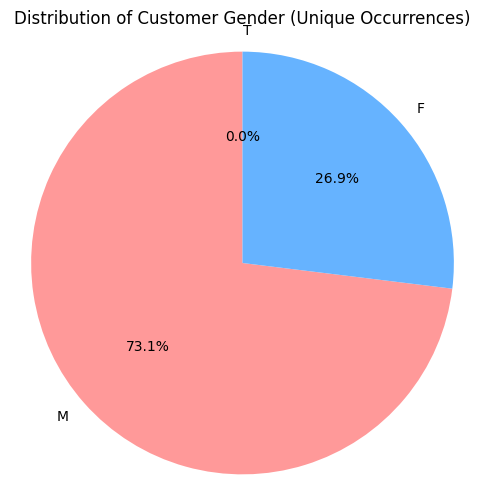

In [ ]:
# Remove duplicate entries based on 'customer_id' to ensure unique occurrences
unique_customers = df.drop_duplicates(subset='customer_id')

# Count the occurrences of each gender after removing duplicates
gender_counts = unique_customers['cust_gender'].value_counts()

# Plot pie chart for 'cust_gender' considering unique customer occurrences
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title('Distribution of Customer Gender (Unique Occurrences)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

# Show the plot
plt.show()

Shows that 73% of bank transactions are made by male, 27% by female and contribution of other genders are neglegible. The same true about gender of customers

In [ ]:
# изучить место жительства клиентов (визуализировать)

In [ ]:
df['cust_location'].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'], dtype=object)

In [ ]:
len(df['cust_location'].unique())

9356

In [ ]:
df['cust_location'].isna().sum()

151

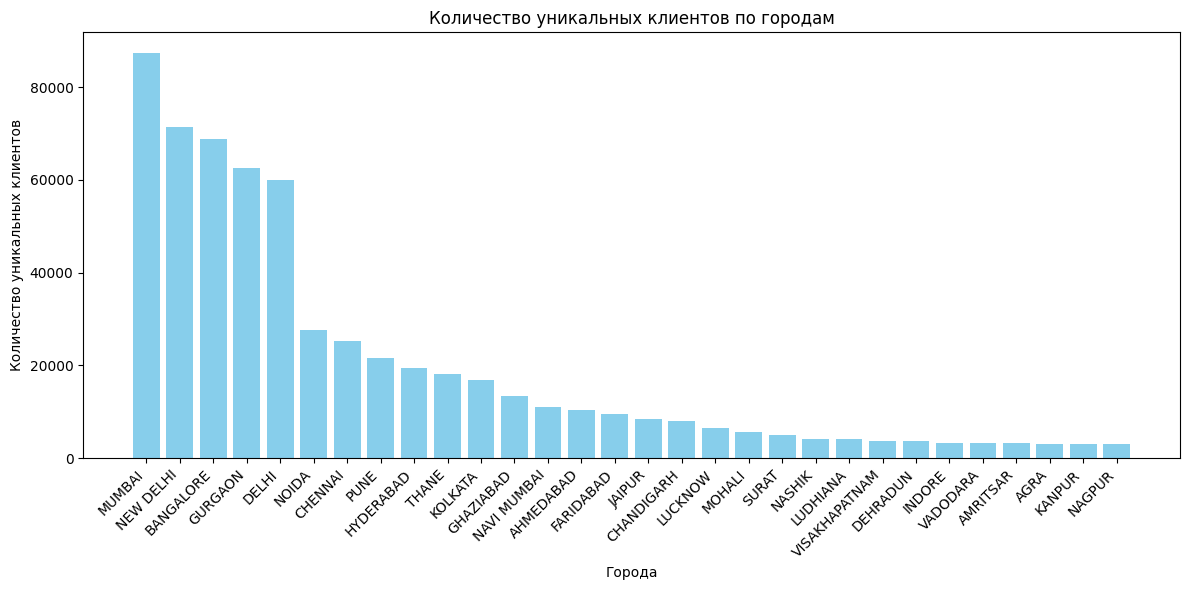

In [ ]:
# Удаление дубликатов по 'customer_id', чтобы учитывать только уникальных клиентов
unique_customers = df.drop_duplicates(subset='customer_id')

# Подсчет количества уникальных клиентов по каждому городу
city_counts = unique_customers['cust_location'].value_counts()

# Сортировка по убыванию и выбор первых 30 городов
top_cities = city_counts.head(30)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(top_cities.index, top_cities.values, color='skyblue')
plt.title('Количество уникальных клиентов по городам')
plt.xlabel('Города')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показ графика
plt.show()

In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1048567 non-null  object        
 1   customer_id             1048567 non-null  object        
 2   customer_dob            1045170 non-null  object        
 3   cust_gender             1047467 non-null  object        
 4   cust_location           1048416 non-null  object        
 5   cust_account_balance    1046198 non-null  float64       
 6   transaction_amount_inr  1048567 non-null  float64       
 7   transaction_datetime    1048567 non-null  datetime64[ns]
 8   customer_age            987831 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 72.0+ MB


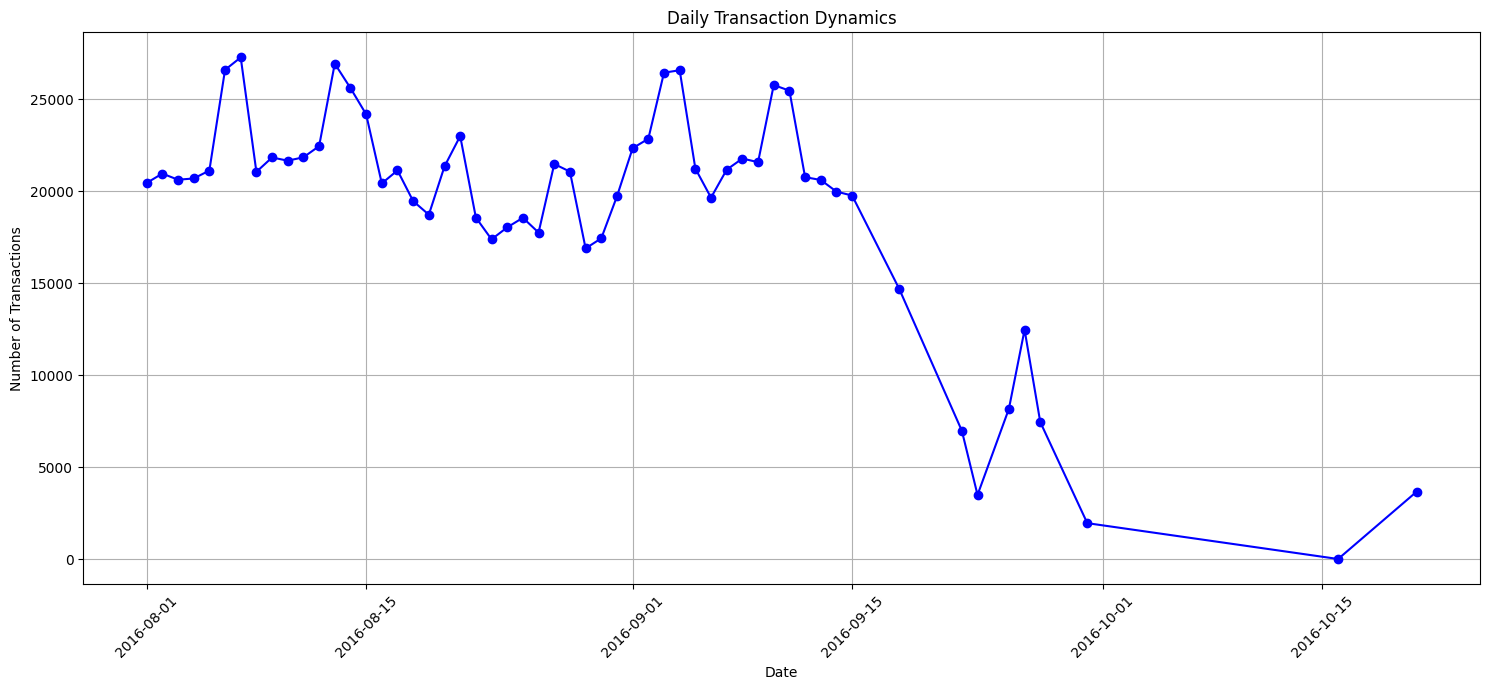

In [ ]:
# Step 1: Extract the date from 'transaction_datetime'
df['transaction_date'] = df['transaction_datetime'].dt.date

# Step 2: Group transactions by date and count the number of transactions per day
# This step will handle missing values in other columns automatically, as we're focusing on 'transaction_datetime'
transactions_per_day = df.groupby('transaction_date').size()

# Step 3: Sort by date to ensure the time series is in the correct order
transactions_per_day = transactions_per_day.sort_index()

# Step 4: Plot the transaction dynamics with a line chart
plt.figure(figsize=(15, 7))
plt.plot(transactions_per_day.index, transactions_per_day.values, marker='o', linestyle='-', color='blue')
plt.title('Daily Transaction Dynamics')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

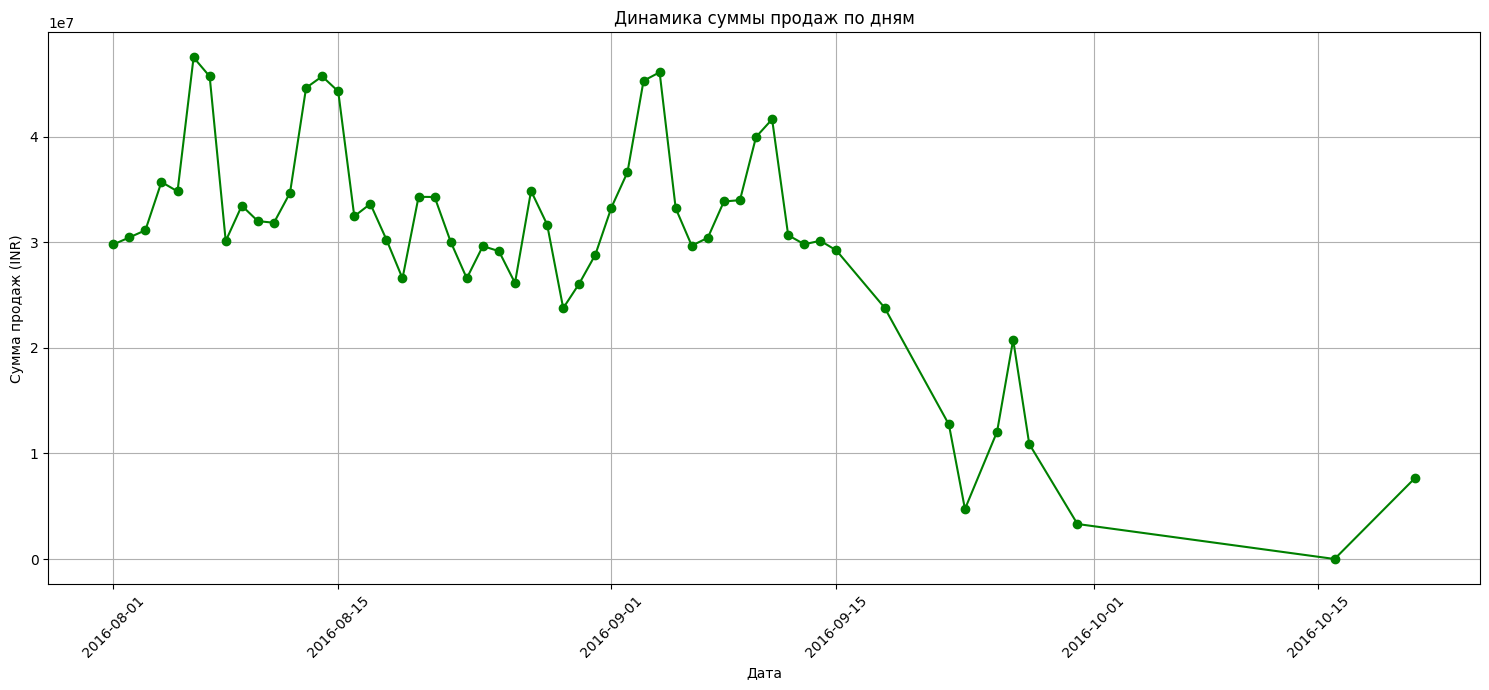

In [ ]:
# Шаг 1: Извлечение даты из 'transaction_datetime'
df['transaction_date'] = df['transaction_datetime'].dt.date

# Шаг 2: Группировка транзакций по дате и суммирование продаж по каждому дню
daily_sales = df.groupby('transaction_date')['transaction_amount_inr'].sum()

# Шаг 3: Сортировка по дате для корректного отображения временного ряда
daily_sales = daily_sales.sort_index()

# Шаг 4: Построение линейного графика динамики суммы продаж по дням
plt.figure(figsize=(15, 7))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='green')
plt.title('Динамика суммы продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показ графика
plt.show()


Сумма всех транзакций за день (как и количество транзакций в день) с августа по середину сентября 2016 года осцилировали на одном уровне. Однако во второй половине сентября началось значительное падение как в количестве транзакций, так и в их общей дневной сумме. Банку капец. Наверное, что-то случилось

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

<ipython-input-52-6011ddfcdcbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['customer_age'] = dff['customer_age'].astype(int)
<ipython-input-52-6011ddfcdcbd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['age_group'] = pd.cut(dff['customer_age'], bins=bins, labels=labels, right=False)
<ipython-input-52-6011ddfcdcbd>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

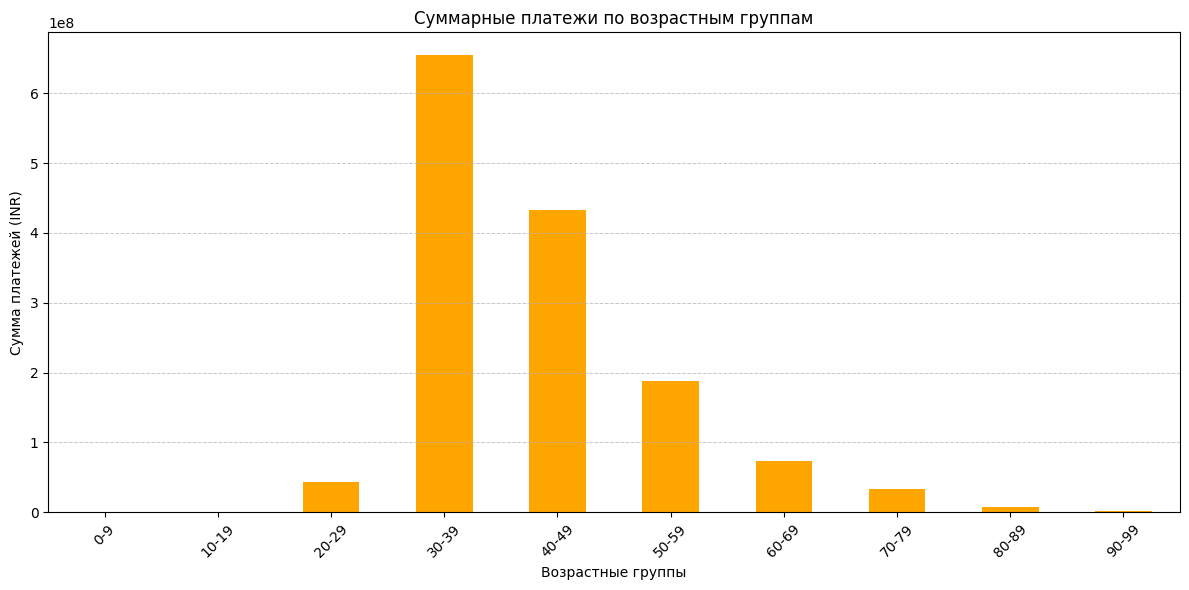

In [ ]:
# Шаг 1: Убедимся, что данные возраста корректны (целые числа)
# Удаляем строки с пропущенными значениями в 'customer_age'
dff = df.dropna(subset=['customer_age'])

# Преобразуем возраст к целому типу
dff['customer_age'] = dff['customer_age'].astype(int)

# Шаг 2: Разделение клиентов на возрастные группы с шагом в 10 лет
# Определяем возрастные группы с шагом в 10 лет
bins = range(0, 101, 10)  # Группы от 0 до 100 лет
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Метки для групп

# Добавление столбца с возрастной группой
dff['age_group'] = pd.cut(dff['customer_age'], bins=bins, labels=labels, right=False)

# Шаг 3: Группировка данных по возрастной группе и суммирование платежей
age_group_sales = dff.groupby('age_group')['transaction_amount_inr'].sum()

# Шаг 4: Построение графика суммарных платежей по возрастным группам
plt.figure(figsize=(12, 6))
age_group_sales.plot(kind='bar', color='orange')
plt.title('Суммарные платежи по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма платежей (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

Наиболее платежеспособная группа 30-39 лет. 40-49 лет - следующая из существенных

In [ ]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

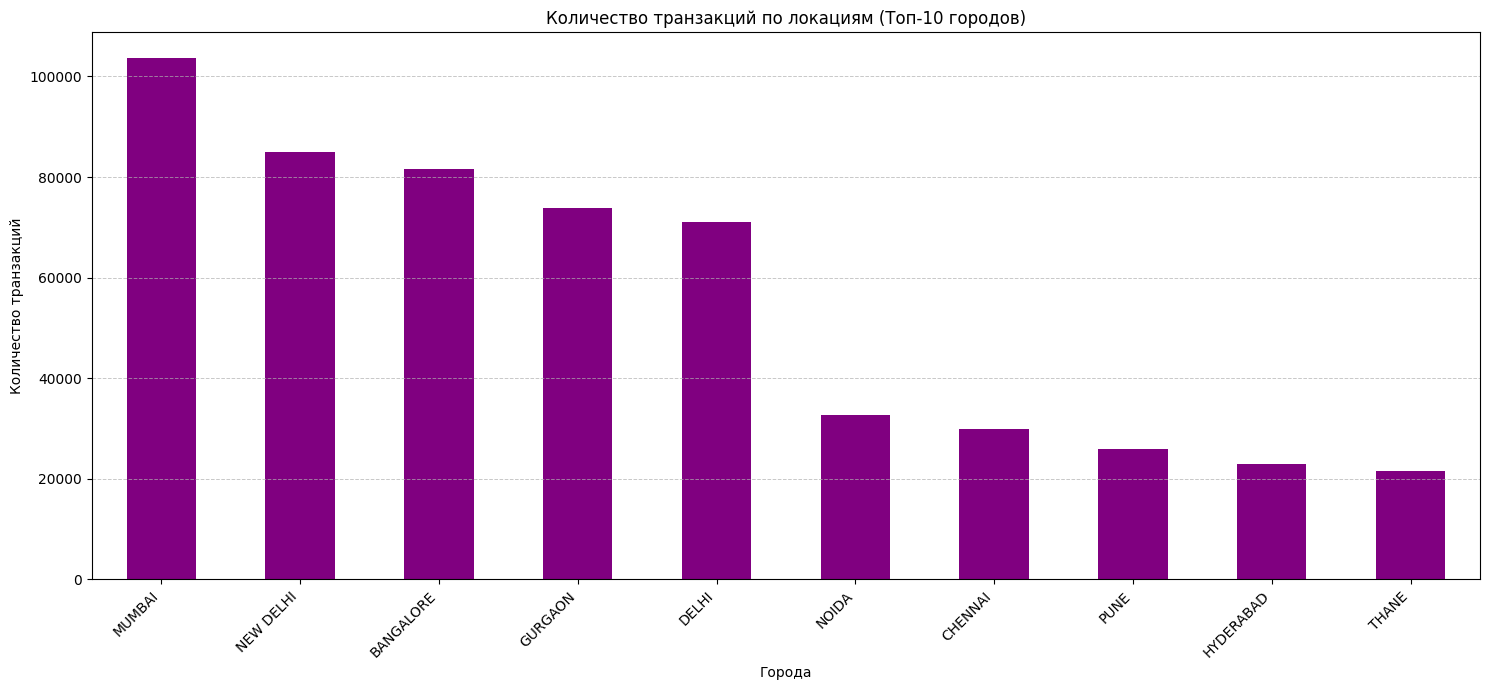

In [ ]:
# Шаг 1: Удаление строк с пропущенными значениями в 'cust_location'
dff = df.dropna(subset=['cust_location'])

# Шаг 2: Группировка данных по 'cust_location' и подсчет количества транзакций
location_transactions = dff['cust_location'].value_counts()

# Шаг 3: Сортировка по количеству транзакций и выбор топ-20 городов
top_locations = location_transactions.head(10)

# Шаг 4: Построение столбчатой диаграммы для топ-10 городов
plt.figure(figsize=(15, 7))
top_locations.plot(kind='bar', color='purple')
plt.title('Количество транзакций по локациям (Топ-10 городов)')
plt.xlabel('Города')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

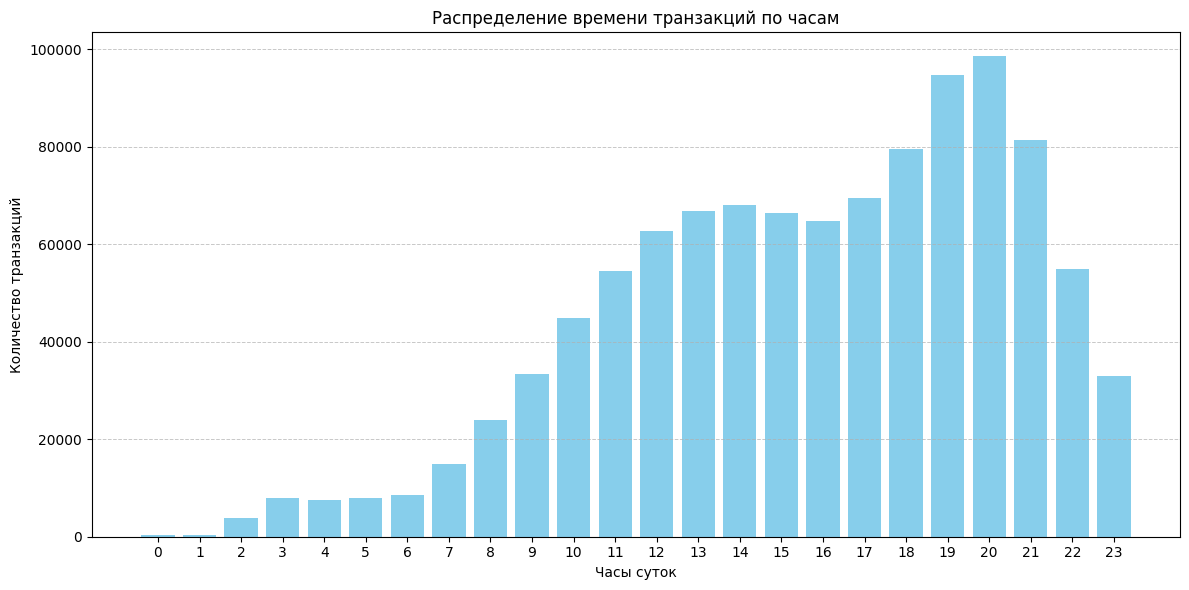

In [ ]:
# Шаг 1: Извлечение времени из 'transaction_datetime'
df['transaction_time'] = df['transaction_datetime'].dt.time

# Шаг 2: Извлечение часов из времени транзакции для анализа по часам
df['transaction_hour'] = df['transaction_datetime'].dt.hour

# Шаг 3: Группировка транзакций по часу и подсчет количества транзакций в каждом часе
transactions_by_hour = df['transaction_hour'].value_counts().sort_index()

# Шаг 4: Построение гистограммы для распределения времени транзакций
plt.figure(figsize=(12, 6))
plt.bar(transactions_by_hour.index, transactions_by_hour.values, color='skyblue')
plt.title('Распределение времени транзакций по часам')
plt.xlabel('Часы суток')
plt.ylabel('Количество транзакций')
plt.xticks(range(0, 24))  # Отображение всех часов от 0 до 23
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

# Финальные выводы на основании исследовательского анализа данных:
## 1 Чистота данных:

Дубликатов в данных не обнаружено, что указывает на хорошее качество исходного набора данных.
Несколько столбцов содержат пропущенные значения, но это не оказало значительного влияния на основные метрики анализа.
## 2 Клиенты и транзакции:

Всего в базе данных 1,048,567 транзакций и 987,831 уникальных клиентов.
В среднем 1.06 транзакций приходится на одного клиента, что предполагает, что большинство клиентов совершили лишь одну транзакцию.
Распределение по сумме баланса счета и транзакций:

Были обнаружены значительные аутлайеры как в данных по балансу счетов, так и по суммам транзакций, что влияет на анализ и требует дополнительного внимания.
После исключения аутлайеров данные показывают более информативные распределения, без экстремальных значений.
## 3 Возраст клиентов:

Наиболее значимая возрастная группа по числу транзакций — 30-39 лет, за ней следует группа 40-49 лет. Эти возрастные группы составляют наиболее платежеспособный сегмент среди клиентов.
## 4 Гендерное распределение:

73% транзакций совершены мужчинами, а 27% — женщинами. Этот результат сохраняется и при учете уникальных клиентов, что свидетельствует о преобладании мужчин среди пользователей банковских услуг.
## 5 Распределение клиентов по локациям:

Большинство клиентов сосредоточены в нескольких крупных городах. Топ-10 городов с наибольшим количеством транзакций включают крупнейшие финансовые и деловые центры страны, что указывает на концентрацию активности в урбанизированных районах.
## 6 Динамика транзакций по датам:

Количество транзакций и их суммарная стоимость оставались на относительно стабильном уровне с начала августа по середину сентября 2016 года.
Во второй половине сентября наблюдается резкое падение как в количестве транзакций, так и в их суммарной дневной стоимости, что может свидетельствовать о внешних экономических факторах или изменениях в банковской политике.
## 7 Распределение времени транзакций:

Транзакции равномерно распределены в течение суток, с небольшими пиками в утренние и вечерние часы. Этот паттерн типичен для поведения потребителей, которые проводят транзакции в начале или в конце рабочего дня.



# Рекомендации:
Провести детальный анализ падения активности во второй половине сентября 2016 года для выявления причин и разработки мер по их устранению.
Углубить анализ сегмента 30-49 лет с целью разработки персонализированных банковских продуктов, которые могут повысить их лояльность и увеличить частоту транзакций.